# MACHINE LEARNING WITH IRIS DATA SET

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import os 
print(os.listdir("../input/iris"))

['Iris.csv', 'database.sqlite']


### UNDERSTANDING THE DATA

In [3]:
iris = pd.read_csv("../input/iris/Iris.csv")
iris.head(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# ADDS STATS DATA LIKE MEAN, MEDIAN, STD DEV, MODE, COUNT, MIN, MAX, QUARTILE
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

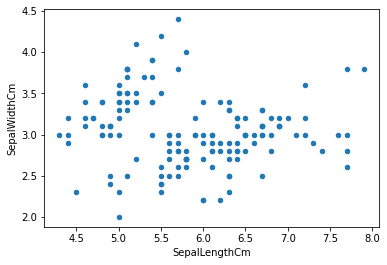

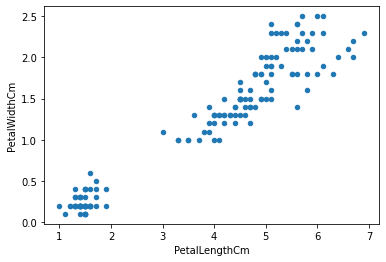

In [5]:
iris.plot(kind = 'scatter',x = 'SepalLengthCm', y = 'SepalWidthCm')
iris.plot(kind = 'scatter',x = 'PetalLengthCm', y = 'PetalWidthCm')

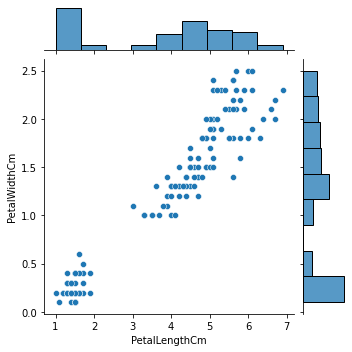

In [6]:
#it shows bivariant scatter plot and univariant histogram in same fig
sns.jointplot(x = 'PetalLengthCm', y = 'PetalWidthCm',data = iris, size = 5)

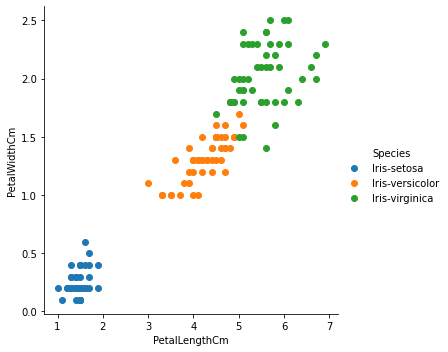

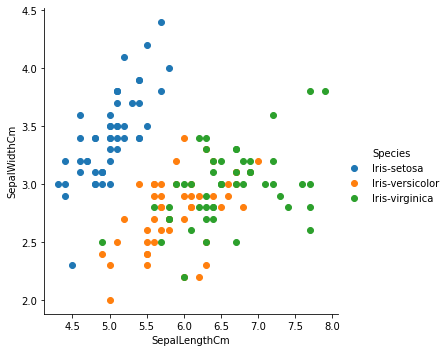

In [7]:
sns.FacetGrid(iris, hue = 'Species', size = 5).map(plt.scatter, 'PetalLengthCm','PetalWidthCm').add_legend()
sns.FacetGrid(iris, hue = 'Species', size = 5).map(plt.scatter, 'SepalLengthCm','SepalWidthCm').add_legend()

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

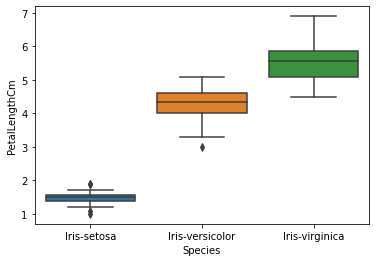

In [8]:
#gives the min, max, median, lower quart(25%), upper quart(75%)
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = iris )

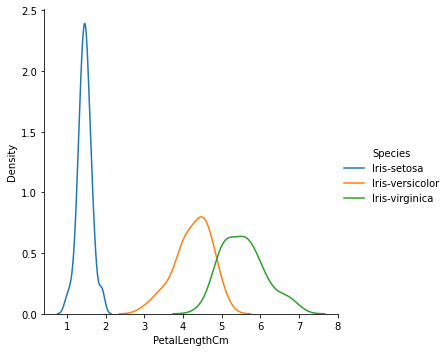

In [9]:
#gives distribution of observations in dataset similar to histogram
sns.FacetGrid(iris,hue = 'Species', size = 5).map(sns.kdeplot, 'PetalLengthCm').add_legend()

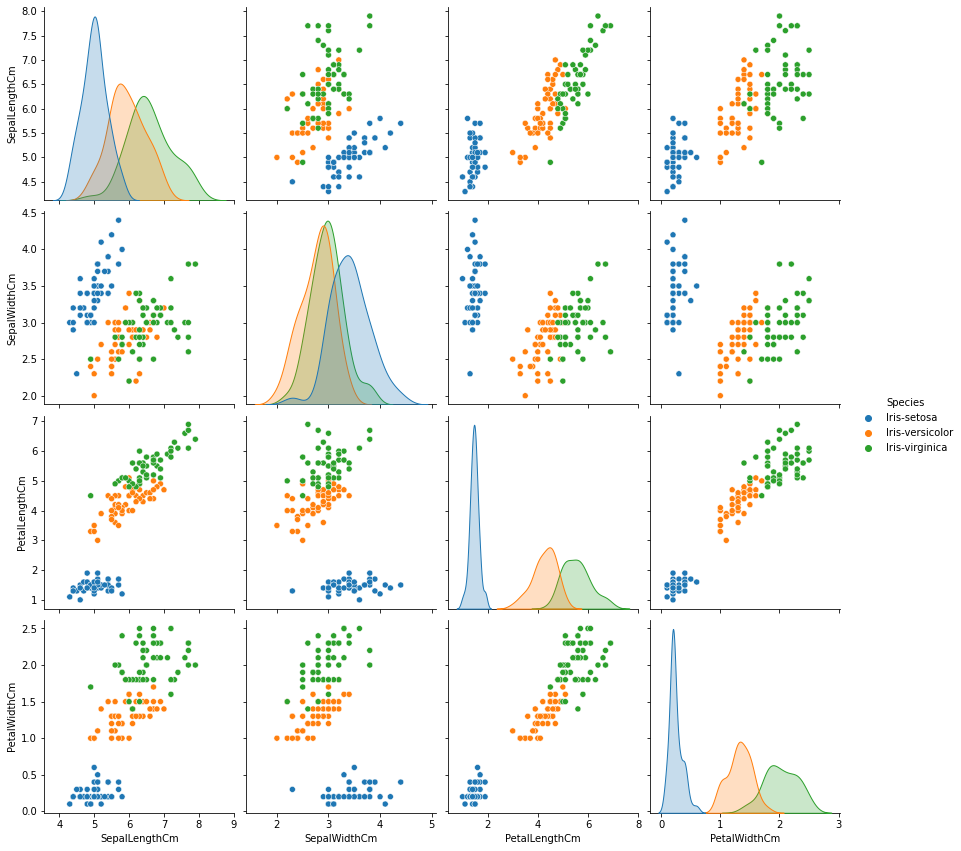

In [10]:
sns.pairplot(iris.drop("Id", axis = 1), hue = 'Species', size = 3)

### DIVIDING THE DATA FOR TRAINING AND TESTING

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [12]:
x = iris.iloc[:, 1:-1].values
y = iris.iloc[:, -1].values

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

### TRAINING THE MODEL

In [14]:
# #logistic regression
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()
# classifier.fit(x_train, y_train)
# y_pred = classifier.predict(x_test)

# print(classification_report(y_pred, y_test))
# print(confusion_matrix(y_pred, y_test))
# print('Accuracy : ', accuracy_score(y_pred, y_test))

In [15]:
#knn classification
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('Accuracy : ', accuracy_score(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[12  0  0]
 [ 0 17  1]
 [ 0  0 15]]
Accuracy :  0.9777777777777777


In [16]:
#svc classification
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('Accuracy : ', accuracy_score(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[12  0  0]
 [ 0 17  0]
 [ 0  0 16]]
Accuracy :  1.0


In [17]:
#decision tree classification
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('Accuracy : ', accuracy_score(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.94      0.91        16
 Iris-virginica       0.94      0.88      0.91        17

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.93      0.93      0.93        45

[[12  0  0]
 [ 0 15  1]
 [ 0  2 15]]
Accuracy :  0.9333333333333333


In [18]:
#naive bayes classification
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('Accuracy : ', accuracy_score(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[12  0  0]
 [ 0 17  1]
 [ 0  0 15]]
Accuracy :  0.9777777777777777


In [19]:
#mlp classifier classification
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('Accuracy : ', accuracy_score(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.94      0.97        17

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[12  0  0]
 [ 0 16  0]
 [ 0  1 16]]
Accuracy :  0.9777777777777777


In [20]:
#extreme gradient boost classification
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('Accuracy : ', accuracy_score(y_pred, y_test))

[16:23:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[12  0  0]
 [ 0 17  1]
 [ 0  0 15]]
Accuracy :  0.9777777777777777
